# **Ridge, Lasso, Elastic Net을 이용한 Odor 분석**
---

## **I. Data (Basic, Log)**

### **1. Data Preparation**

In [9]:
import numpy as np
import pandas as pd

In [10]:
data_path = "drive/MyDrive/PLS_양돈 농가/"

#### **- Original**

In [11]:
### 원 데이터

odor = pd.read_csv(data_path + "New_data_preprocessed.csv", encoding="euc-kr")
odor.rename(columns = {"mm.1" : "mm"}, inplace = True)    # 추후 변수명을 편하게 사용하기 위해
# odor = odor.drop(["yy", "mm", "dd", "farm"], axis = 1)    # 불필요한 변수 제거
# odor = odor.drop(["측정일", "농장명"], axis = 1)    # 불필요한 변수 제거
print(odor.shape)

(57, 15)


In [12]:
display(odor.head())
display(np.round(odor.describe(), 3))

,ou,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,300,0.56,145.0,0.09,12.80,30.60,17.57,2.78,10.80,3.64,7.72,2.84,0.03,0.20,3.00
1,300,0.62,310.0,19.40,462.00,916.52,1055.96,109.07,977.44,319.49,619.49,30.51,137.81,3.60,10.40
2,448,0.97,90.5,0.04,63.90,663.42,737.23,73.94,837.83,215.64,469.79,14.61,67.52,0.94,3.92
3,2080,1.02,344.0,0.04,13.00,490.79,570.61,51.09,719.27,168.48,237.64,8.90,60.56,5.55,7.31
4,310,1.18,312.0,0.04,0.04,404.53,468.03,43.17,573.75,157.22,205.67,9.21,69.90,0.20,5.43


,ou,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,1579.649,5.894,364.623,14.346,11.989,533.212,398.673,38.327,338.586,99.495,191.457,13.147,74.291,2.422,4.429
std,1521.333,5.156,401.594,26.108,61.543,548.733,381.129,36.946,317.637,121.992,305.561,18.817,78.959,3.480,5.221
min,100.000,0.560,22.900,0.040,0.040,0.170,0.170,0.930,0.470,1.580,0.270,0.050,0.030,0.200,0.190
25%,448.000,2.080,86.000,0.040,0.040,71.480,77.500,9.260,46.550,21.470,29.800,3.870,16.620,0.200,1.430
50%,1000.000,4.150,268.000,0.040,0.040,357.890,383.930,35.580,235.890,73.400,89.920,9.220,60.560,1.060,2.750
75%,2080.000,9.540,457.000,16.400,2.550,885.900,505.400,47.950,547.440,135.790,207.800,14.610,98.700,3.600,5.430
max,6694.000,22.240,1754.000,120.000,462.000,2446.000,2109.690,217.170,1455.520,743.690,1869.400,125.720,481.200,22.260,34.570


#### **- 결측값 확인 및 처리**

- ND → MDL/2
- NA → Multiple Imputation Method

In [13]:
### 결측값 확인
num_na = odor.isna().sum().sum()
num_nd = odor.apply(lambda x : (x == "ND").sum(), axis = 0).sum()

print("NA 개수 :", num_na, " ND 개수 :",  num_nd)
display(pd.DataFrame(odor.isna().sum()).transpose())
display(pd.DataFrame(odor.apply(lambda x : (x == "ND").sum(), axis = 0)).transpose())

NA 개수 : 0  ND 개수 : 0


,ou,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,ou,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
mdl = pd.read_csv(data_path + "MDL.csv")
# mdl.columns = odor.columns[1:]
mdl

,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,0.08,0.06,0.07,0.08,0.05,0.07,0.34,0.52,0.93,0.49,0.53,0.09,0.06,0.4,0.38


In [15]:
!pip install impyute

In [16]:
### 결측치 처리

# ND 값 → MDL/2
if num_nd != 0 :
  for i in range(1, odor.shape[1]) :
    var = odor.columns[i]
    odor[var] = odor[var].replace("ND", mdl[var][0]/2)

odor = (odor).astype(float)


# 결측값 → M.I method
from impyute.imputation.cs import mice
if num_na != 0 :
  odor = pd.DataFrame(mice(odor.values))



# 결측값 확인
num_na = odor.isna().sum().sum()
num_nd = odor.apply(lambda x : (x == "ND").sum(), axis = 0).sum()

print("NA 개수 :", num_na, " ND 개수 :",  num_nd)
display(odor.head())

NA 개수 : 0  ND 개수 : 0


,ou,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,300.0,0.56,145.0,0.09,12.80,30.60,17.57,2.78,10.80,3.64,7.72,2.84,0.03,0.20,3.00
1,300.0,0.62,310.0,19.40,462.00,916.52,1055.96,109.07,977.44,319.49,619.49,30.51,137.81,3.60,10.40
2,448.0,0.97,90.5,0.04,63.90,663.42,737.23,73.94,837.83,215.64,469.79,14.61,67.52,0.94,3.92
3,2080.0,1.02,344.0,0.04,13.00,490.79,570.61,51.09,719.27,168.48,237.64,8.90,60.56,5.55,7.31
4,310.0,1.18,312.0,0.04,0.04,404.53,468.03,43.17,573.75,157.22,205.67,9.21,69.90,0.20,5.43


#### **- log y**

In [17]:
### Response variables에 log화
log_odor = pd.concat([np.log(odor["ou"]), odor.iloc[:,1:]], axis = 1)

display(log_odor.head())
display(np.round(log_odor.describe(), 3))

,ou,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,5.703782,0.56,145.0,0.09,12.80,30.60,17.57,2.78,10.80,3.64,7.72,2.84,0.03,0.20,3.00
1,5.703782,0.62,310.0,19.40,462.00,916.52,1055.96,109.07,977.44,319.49,619.49,30.51,137.81,3.60,10.40
2,6.104793,0.97,90.5,0.04,63.90,663.42,737.23,73.94,837.83,215.64,469.79,14.61,67.52,0.94,3.92
3,7.640123,1.02,344.0,0.04,13.00,490.79,570.61,51.09,719.27,168.48,237.64,8.90,60.56,5.55,7.31
4,5.736572,1.18,312.0,0.04,0.04,404.53,468.03,43.17,573.75,157.22,205.67,9.21,69.90,0.20,5.43


,ou,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,6.920,5.894,364.623,14.346,11.989,533.212,398.673,38.327,338.586,99.495,191.457,13.147,74.291,2.422,4.429
std,0.992,5.156,401.594,26.108,61.543,548.733,381.129,36.946,317.637,121.992,305.561,18.817,78.959,3.480,5.221
min,4.605,0.560,22.900,0.040,0.040,0.170,0.170,0.930,0.470,1.580,0.270,0.050,0.030,0.200,0.190
25%,6.105,2.080,86.000,0.040,0.040,71.480,77.500,9.260,46.550,21.470,29.800,3.870,16.620,0.200,1.430
50%,6.908,4.150,268.000,0.040,0.040,357.890,383.930,35.580,235.890,73.400,89.920,9.220,60.560,1.060,2.750
75%,7.640,9.540,457.000,16.400,2.550,885.900,505.400,47.950,547.440,135.790,207.800,14.610,98.700,3.600,5.430
max,8.809,22.240,1754.000,120.000,462.000,2446.000,2109.690,217.170,1455.520,743.690,1869.400,125.720,481.200,22.260,34.570


### **2. Visualization**

#### **- Response variable**

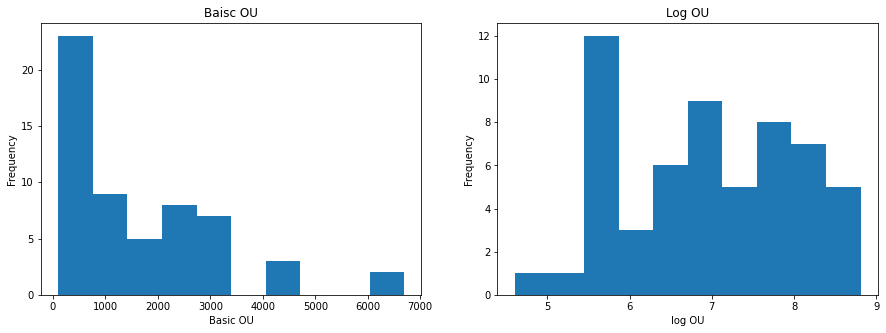

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.hist(odor["ou"])
plt.title("Baisc OU")
plt.xlabel("Basic OU")  ; plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(log_odor["ou"])
plt.title("Log OU")
plt.xlabel("log OU")  ; plt.ylabel("Frequency")

plt.show()

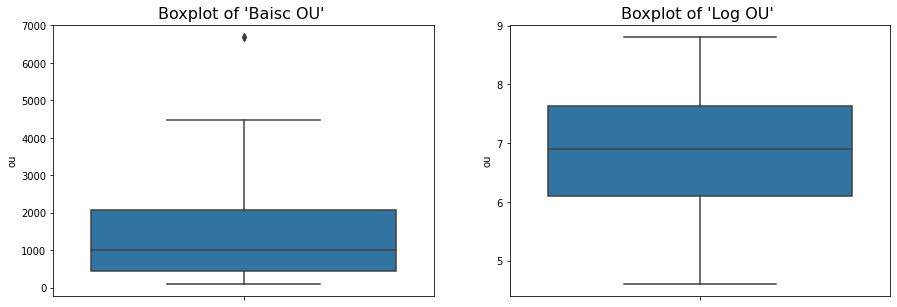

In [19]:
import seaborn as sns
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.boxplot(y = odor["ou"])
plt.title("Boxplot of 'Baisc OU' ", fontsize = 16)

plt.subplot(1,2,2)
sns.boxplot(y = log_odor["ou"])
plt.title("Boxplot of 'Log OU' ", fontsize = 16)
plt.show()

#### **- Explanatory variables**

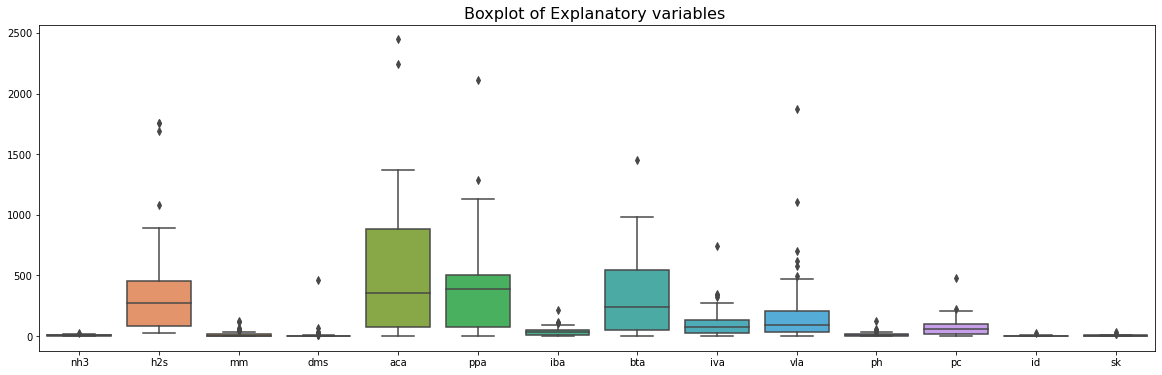

In [20]:
plt.figure(figsize = (20, 6))
sns.boxplot(data = odor.iloc[:,1:])
plt.title("Boxplot of Explanatory variables ", fontsize = 16)
plt.show()

### **3. Correlation**

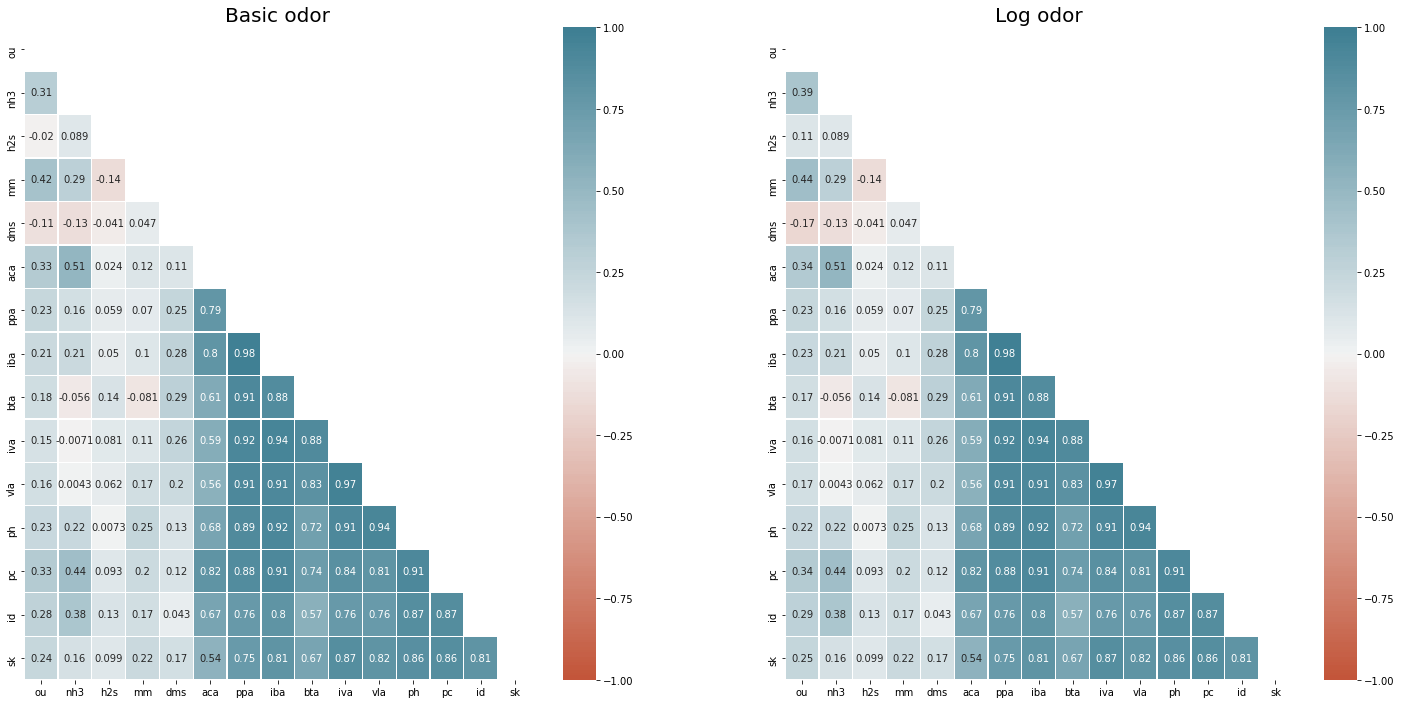

In [21]:
basic_corr = odor.corr()
log_corr = log_odor.corr()

### 그래프의 윗부분을 공백화
mask = np.zeros_like(basic_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (25,12))

### Basic 
plt.subplot(1,2,1)
sns.heatmap(basic_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Basic odor", fontsize = 20)

### Log
plt.subplot(1,2,2)
sns.heatmap(log_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Log odor", fontsize = 20)

plt.show()

Max Corrleation : 0.421


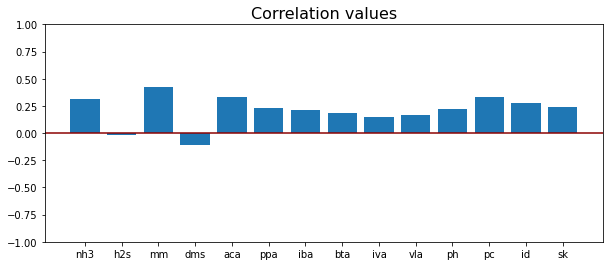

In [22]:
print("Max Corrleation :", np.round(max(basic_corr.iloc[0, 1:]), 3))

### Response에 대한 설명변수의 correlation
plt.figure(figsize = (10, 4))
plt.bar(range(basic_corr.shape[1]-1), basic_corr.iloc[0, 1:],)
plt.xticks(range(basic_corr.shape[1]-1), labels = basic_corr.columns[1:])
plt.ylim(-1, 1)
plt.axhline(0, linestyle = "-", color = "darkred")
plt.title("Correlation values", fontsize = 16)
plt.show()

### **4. VIF**

In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

basic_model = ols("ou ~ " + " + ".join(odor.columns), data = odor).fit()
# basic_model.summary()
X = odor.iloc[:, 1:]

### Baisc
basic_vif = pd.DataFrame()
basic_vif["Basic VIF"] = [np.round(variance_inflation_factor(X.values, i), 3) for i in range(X.shape[1])]
basic_vif = basic_vif.transpose()
basic_vif.columns = X.columns
display(basic_vif)


### Log
log_vif = pd.DataFrame()
log_vif["Log VIF"] = [np.round(variance_inflation_factor(X.values, i), 3) for i in range(X.shape[1])]
log_vif = log_vif.transpose()
log_vif.columns = X.columns
display(log_vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
Basic VIF,8.508,2.169,1.915,1.627,21.841,180.933,330.37,50.279,199.977,59.824,65.725,51.498,9.174,17.241


,nh3,h2s,mm,dms,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
Log VIF,8.508,2.169,1.915,1.627,21.841,180.933,330.37,50.279,199.977,59.824,65.725,51.498,9.174,17.241


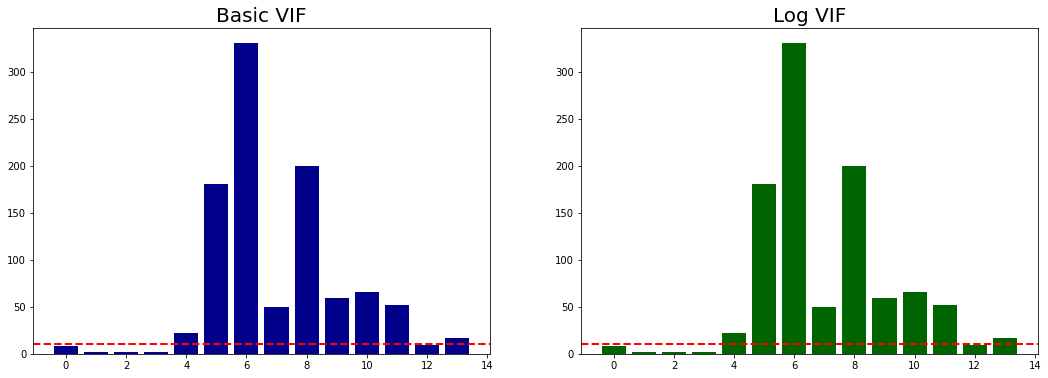

In [24]:
plt.figure(figsize = (18, 6))

plt.subplot(1,2,1)
plt.bar(range(basic_vif.shape[1]), basic_vif.iloc[0,:], color = "darkblue")
plt.axhline(10, linestyle = "--", color = "r", linewidth = 2)
plt.title("Basic VIF", fontsize = 20)

plt.subplot(1,2,2)
plt.bar(range(log_vif.shape[1]), log_vif.iloc[0, :], color = "darkgreen")
plt.axhline(10, linestyle = "--", color = "r", linewidth = 2)
plt.title("Log VIF", fontsize = 20)

plt.show()

## **II. Ridge regression**

In [44]:
from sklearn.linear_model import Ridge

X = odor.iloc[:, 1:]
y = odor.iloc[:, 0]

rm = Ridge(alpha = 0.2).fit(X, y)

In [46]:
rm.set_params()

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
def ridge_loocv(data, alpha) :
  from sklearn.linear_model import Ridge

  predict = []
  real = []

  for i in range(data.shape[0]) :
    train = data.drop(data.index[i]) 
    test = pd.DataFrame(data.iloc[i, :]).T
  
    train_y = train.iloc[:, 0]
    train_X = train.iloc[:, 1:]

    test_y = test.iloc[:, 0].values
    test_X = test.iloc[:, 1:]


    ridge_model = Ridge(alpha = alpha).fit(train_X, train_y)

    pred = ridge_model.predict(test_X)[0]

    predict.append(pred)
    real.append(test_y[0])


  return {"predict" : predict, "real" : real}

In [26]:
rid_result = ridge_loocv(data = odor, alpha = 0.05)

,Cal R2,Built in R2,RMSE,MAE
Basic Ridge,0.055,-0.266,4569773.499,1328.723


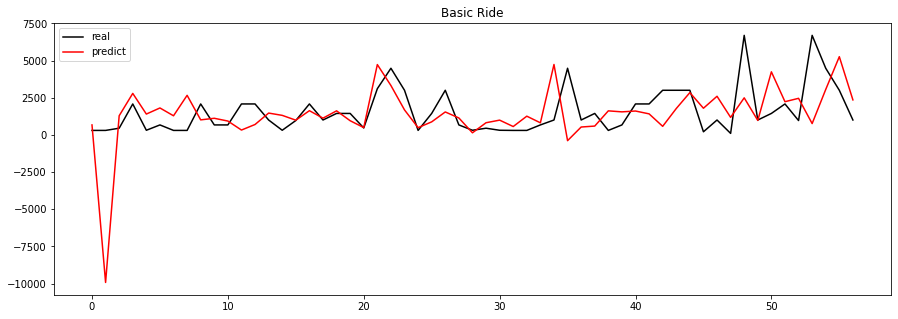

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

rid_pred = rid_result["predict"]
rid_real = rid_result["real"]

rid_cal_r2 = np.round(np.corrcoef(rid_pred, rid_real)[0, 1]**2, 3)
rid_bif_r2 = np.round(r2_score(rid_pred, rid_real), 3)
rid_rmse = np.round(rmse(rid_pred, rid_real), 3)
rid_mae = np.round(mae(rid_pred, rid_real), 3)

rid_result = pd.DataFrame([rid_cal_r2, rid_bif_r2, rid_rmse, rid_mae],
                          columns = ["Basic Ridge"],
                          index = ["Cal R2", "Built in R2", "RMSE", "MAE"]).T
display(rid_result)

plt.figure(figsize = (15, 5))
plt.plot(rid_real, color = "black")
plt.plot(rid_pred, color = "red")
plt.title("Basic Ride")
plt.legend(loc = "upper left", labels = ["real", "predict"])
plt.show()

In [28]:
log_rid_result = ridge_loocv(data = log_odor, alpha = 0.05)

,Cal R2,Built in R2,RMSE,MAE
Log Ridge,0.111,-0.229,3369249.834,1149.0


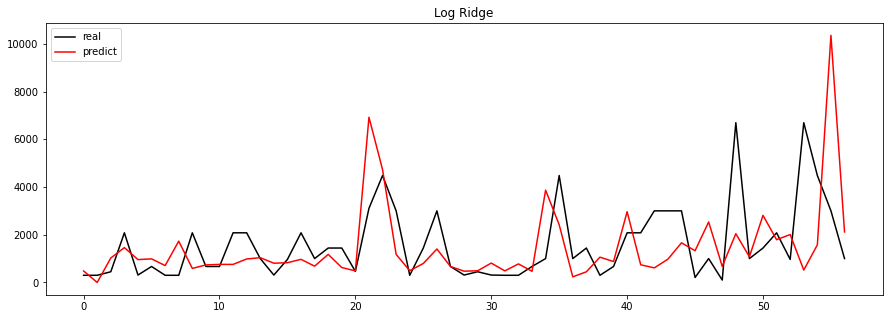

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

# log_rid_pred = log_rid_result["predict"]
log_rid_pred = np.exp(log_rid_result["predict"])
# log_rid_real = log_rid_result["real"]
log_rid_real = np.exp(log_rid_result["real"])

log_rid_cal_r2 = np.round(np.corrcoef(log_rid_pred, log_rid_real)[0, 1]**2, 3)
log_rid_bif_r2 = np.round(r2_score(log_rid_pred, log_rid_real), 3)
log_rid_rmse = np.round(rmse(log_rid_pred, log_rid_real), 3)
log_rid_mae = np.round(mae(log_rid_pred, log_rid_real), 3)

log_rid_result = pd.DataFrame([log_rid_cal_r2, log_rid_bif_r2, log_rid_rmse, log_rid_mae],
                          columns = ["Log Ridge"],
                          index = ["Cal R2", "Built in R2", "RMSE", "MAE"]).T
display(log_rid_result)

plt.figure(figsize = (15, 5))
plt.plot(log_rid_real, color = "black")
plt.plot(log_rid_pred, color = "red")
plt.title("Log Ridge")
plt.legend(loc = "upper left", labels = ["real", "predict"])
plt.show()

## **III. Lasso regression**

In [30]:
def lasso_loocv(data, alpha, iter) :
  from sklearn.linear_model import Lasso

  predict = []
  real = []

  for i in range(data.shape[0]) :
    train = data.drop(data.index[i]) 
    test = pd.DataFrame(data.iloc[i, :]).T
  
    train_y = train.iloc[:, 0]
    train_X = train.iloc[:, 1:]

    test_y = test.iloc[:, 0].values
    test_X = test.iloc[:, 1:]


    lasso_model = Lasso(alpha = alpha,  max_iter = iter).fit(train_X, train_y)

    pred = lasso_model.predict(test_X)[0]

    predict.append(pred)
    real.append(test_y[0])


  return {"predict" : predict, "real" : real}

In [31]:
las_result = lasso_loocv(data = odor, alpha = 1.0, iter = 1000)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9019492.7389014, tolerance: 12794.265800000001
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12758836.642038863, tolerance: 12794.265800000001
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1774698.8334438428, tolerance: 12830.590285714285
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15297101.

,Cal R2,Built in R2,RMSE,MAE
Basic Lasso,0.055,-0.266,4563587.169,1327.717


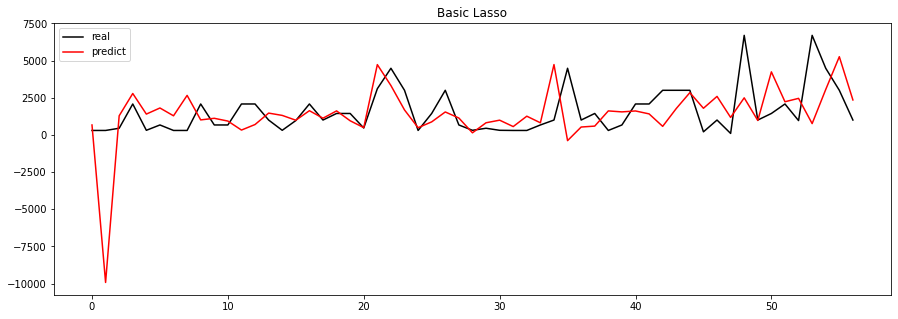

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

las_pred = las_result["predict"]
las_real = las_result["real"]

las_cal_r2 = np.round(np.corrcoef(las_pred, las_real)[0, 1]**2, 3)
las_bif_r2 = np.round(r2_score(las_pred, las_real), 3)
las_rmse = np.round(rmse(las_pred, las_real), 3)
las_mae = np.round(mae(las_pred, las_real), 3)

las_result = pd.DataFrame([las_cal_r2, las_bif_r2, las_rmse, las_mae],
                          columns = ["Basic Lasso"],
                          index = ["Cal R2", "Built in R2", "RMSE", "MAE"]).T
display(las_result)

plt.figure(figsize = (15, 5))
plt.plot(las_real, color = "black")
plt.plot(las_pred, color = "red")
plt.title("Basic Lasso")
plt.legend(loc = "upper left", labels = ["real", "predict"])
plt.show()

In [33]:
log_las_result = lasso_loocv(data = log_odor, alpha = 1.0, iter = 1000)

,Cal R2,Built in R2,RMSE,MAE
Log Lasso,0.14,-1.024,2308096.536,1012.462


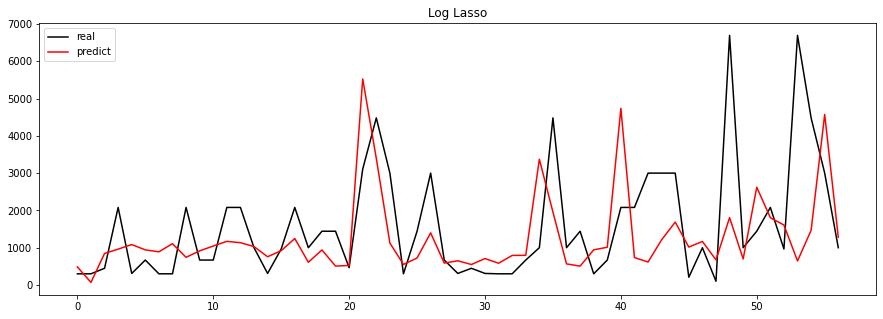

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

# log_las_pred = log_las_result["predict"]
log_las_pred = np.exp(log_las_result["predict"])
# log_las_real = log_las_result["real"]
log_las_real = np.exp(log_las_result["real"])

log_las_cal_r2 = np.round(np.corrcoef(log_las_pred, log_las_real)[0, 1]**2, 3)
log_las_bif_r2 = np.round(r2_score(log_las_pred, log_las_real), 3)
log_las_rmse = np.round(rmse(log_las_pred, log_las_real), 3)
log_las_mae = np.round(mae(log_las_pred, log_las_real), 3)

log_las_result = pd.DataFrame([log_las_cal_r2, log_las_bif_r2, log_las_rmse, log_las_mae],
                          columns = ["Log Lasso"],
                          index = ["Cal R2", "Built in R2", "RMSE", "MAE"]).T
display(log_las_result)

plt.figure(figsize = (15, 5))
plt.plot(log_las_real, color = "black")
plt.plot(log_las_pred, color = "red")
plt.title("Log Lasso")
plt.legend(loc = "upper left", labels = ["real", "predict"])
plt.show()

## **IV. Elastic Net regression**

In [35]:
def elastic_loocv(data, alpha, ratio, seed = 99) :
  from sklearn.linear_model import ElasticNet

  predict = []
  real = []

  for i in range(data.shape[0]) :
    train = data.drop(data.index[i]) 
    test = pd.DataFrame(data.iloc[i, :]).T
  
    train_y = train.iloc[:, 0]
    train_X = train.iloc[:, 1:]

    test_y = test.iloc[:, 0].values
    test_X = test.iloc[:, 1:]


    elastic_model = ElasticNet(alpha = alpha,  l1_ratio = ratio, random_state = seed).fit(train_X, train_y)

    pred = elastic_model.predict(test_X)[0]

    predict.append(pred)
    real.append(test_y[0])


  return {"predict" : predict, "real" : real}

In [36]:
elas_result = elastic_loocv(data = odor, alpha = 1.0, ratio = 0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10012619.368825488, tolerance: 12794.265800000001
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13495212.116925877, tolerance: 12794.265800000001
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1401907.950142935, tolerance: 12830.590285714285
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1511124

,Cal R2,Built in R2,RMSE,MAE
Basic Elastic Net,0.057,-0.269,4499556.583,1306.77


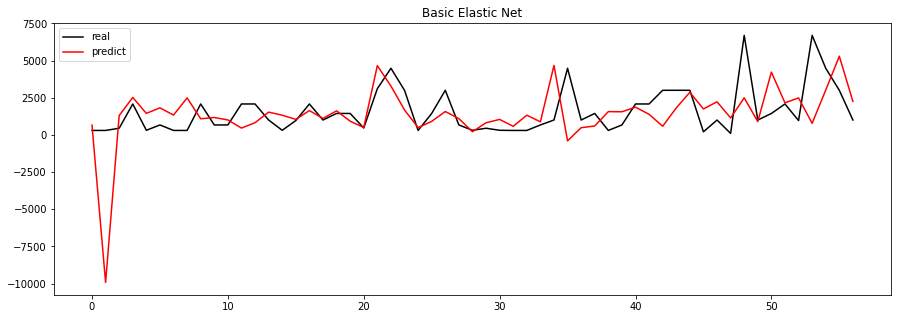

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

elas_pred = elas_result["predict"]
elas_real = elas_result["real"]

elas_cal_r2 = np.round(np.corrcoef(elas_pred, elas_real)[0, 1]**2, 3)
elas_bif_r2 = np.round(r2_score(elas_pred, elas_real), 3)
elas_rmse = np.round(rmse(elas_pred, elas_real), 3)
elas_mae = np.round(mae(elas_pred, elas_real), 3)

elas_result = pd.DataFrame([elas_cal_r2, elas_bif_r2, elas_rmse, elas_mae],
                          columns = ["Basic Elastic Net"],
                          index = ["Cal R2", "Built in R2", "RMSE", "MAE"]).T
display(elas_result)

plt.figure(figsize = (15, 5))
plt.plot(elas_real, color = "black")
plt.plot(elas_pred, color = "red")
plt.title("Basic Elastic Net")
plt.legend(loc = "upper left", labels = ["real", "predict"])
plt.show()

In [38]:
log_elas_result = elastic_loocv(data = log_odor, alpha = 1.0, ratio = 0.5)

,Cal R2,Built in R2,RMSE,MAE
Log Elastic Net,0.144,-0.683,2413360.791,1035.787


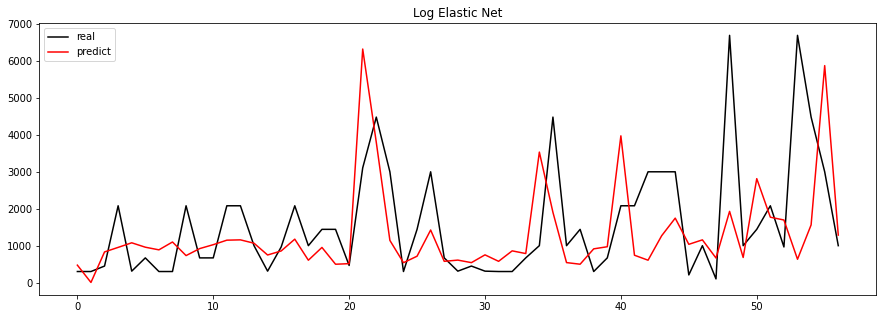

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

# log_elas_pred = log_elas_result["predict"]
log_elas_pred = np.exp(log_elas_result["predict"])
# log_elas_real = log_elas_result["real"]
log_elas_real = np.exp(log_elas_result["real"])

log_elas_cal_r2 = np.round(np.corrcoef(log_elas_pred, log_elas_real)[0, 1]**2, 3)
log_elas_bif_r2 = np.round(r2_score(log_elas_pred, log_elas_real), 3)
log_elas_rmse = np.round(rmse(log_elas_pred, log_elas_real), 3)
log_elas_mae = np.round(mae(log_elas_pred, log_elas_real), 3)

log_elas_result = pd.DataFrame([log_elas_cal_r2, log_elas_bif_r2, log_elas_rmse, log_elas_mae],
                          columns = ["Log Elastic Net"],
                          index = ["Cal R2", "Built in R2", "RMSE", "MAE"]).T
display(log_elas_result)

plt.figure(figsize = (15, 5))
plt.plot(log_elas_real, color = "black")
plt.plot(log_elas_pred, color = "red")
plt.title("Log Elastic Net")
plt.legend(loc = "upper left", labels = ["real", "predict"])
plt.show()

## **V. Result**

In [40]:
all_result = pd.concat([rid_result, log_rid_result, las_result, log_las_result, elas_result, log_elas_result],
                       axis = 0)
all_result

,Cal R2,Built in R2,RMSE,MAE
Basic Ridge,0.055,-0.266,4569773.499,1328.723
Log Ridge,0.111,-0.229,3369249.834,1149.000
Basic Lasso,0.055,-0.266,4563587.169,1327.717
Log Lasso,0.140,-1.024,2308096.536,1012.462
Basic Elastic Net,0.057,-0.269,4499556.583,1306.770
Log Elastic Net,0.144,-0.683,2413360.791,1035.787


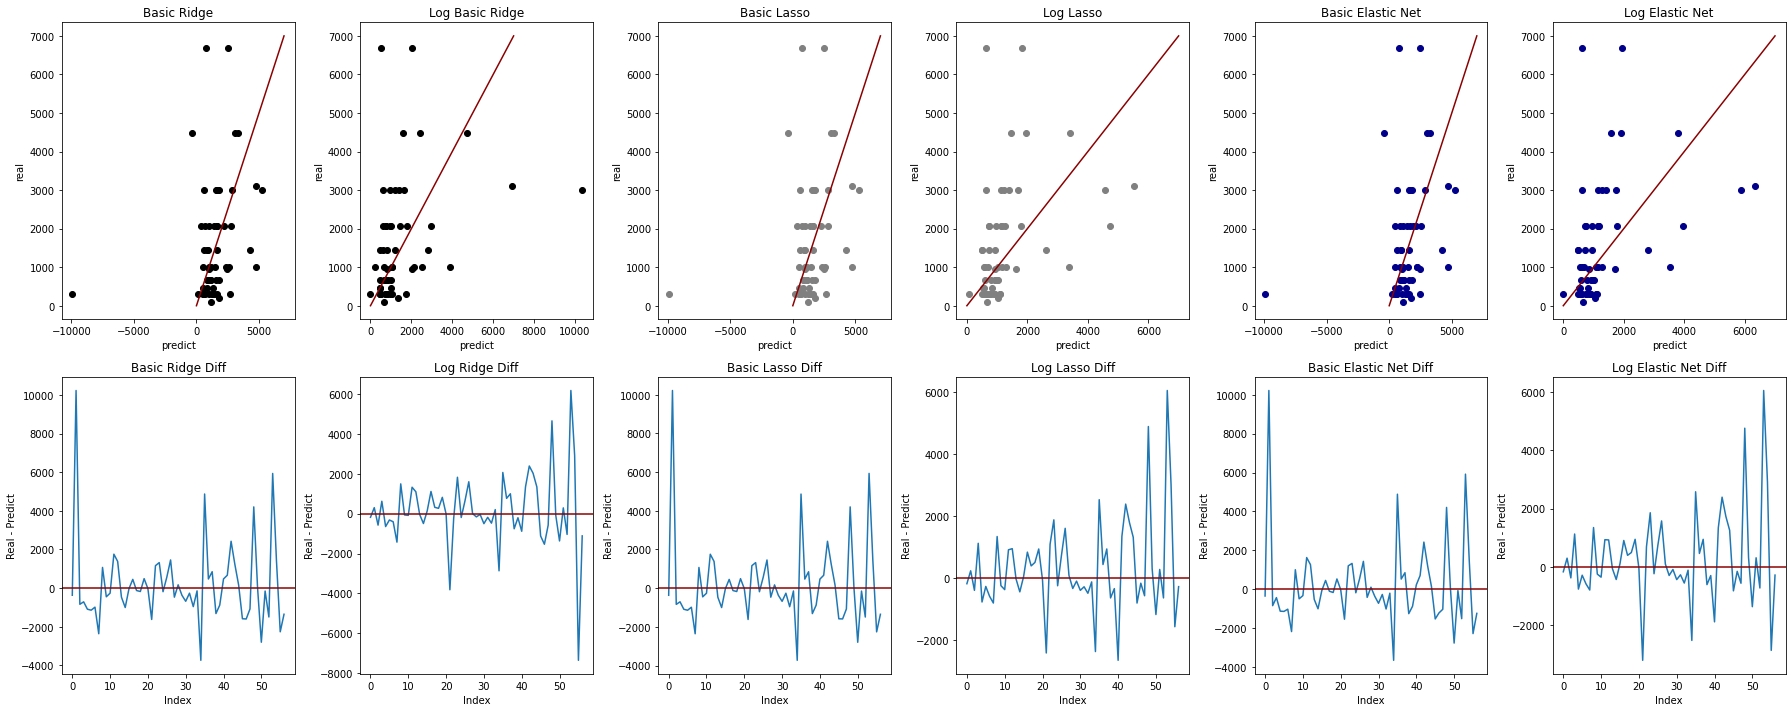

In [41]:
plt.figure(figsize = (25, 10))

plt.subplot(2, 6, 1)
plt.scatter(rid_pred, rid_real, color = "black")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("predict") ; plt.ylabel("real")
plt.title("Basic Ridge")

plt.subplot(2, 6, 2)
plt.scatter(log_rid_pred, log_rid_real, color = "black")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("predict") ; plt.ylabel("real")
plt.title("Log Basic Ridge")

plt.subplot(2, 6, 3)
plt.scatter(las_pred, las_real, color = "grey")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("predict") ; plt.ylabel("real")
plt.title("Basic Lasso")

plt.subplot(2, 6, 4)
plt.scatter(log_las_pred, log_las_real, color = "grey")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("predict") ; plt.ylabel("real")
plt.title("Log Lasso")

plt.subplot(2, 6, 5)
plt.scatter(elas_pred, elas_real, color = "darkblue")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("predict") ; plt.ylabel("real")
plt.title("Basic Elastic Net")

plt.subplot(2, 6, 6)
plt.scatter(log_elas_pred, log_elas_real, color = "darkblue")
plt.plot((0, 7000), (0, 7000), color = "darkred")
plt.xlabel("predict") ; plt.ylabel("real")
plt.title("Log Elastic Net")


###

plt.subplot(2, 6, 7)
rid_diff = [rid_real[i] - rid_pred[i] for i in range(len(rid_real))]
plt.plot(rid_diff)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Basic Ridge Diff")

plt.subplot(2, 6, 8)
log_rid_diff = [log_rid_real[i] - log_rid_pred[i] for i in range(len(log_rid_real))]
plt.plot(log_rid_diff)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Log Ridge Diff")

plt.subplot(2, 6, 9)
las_diff = [las_real[i] - las_pred[i] for i in range(len(las_real))]
plt.plot(las_diff)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Basic Lasso Diff")

plt.subplot(2, 6, 10)
log_las_diff = [log_las_real[i] - log_las_pred[i] for i in range(len(log_las_real))]
plt.plot(log_las_diff)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Log Lasso Diff")

plt.subplot(2, 6, 11)
elas_diff = [elas_real[i] - elas_pred[i] for i in range(len(elas_real))]
plt.plot(elas_diff)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Basic Elastic Net Diff")

plt.subplot(2, 6, 12)
log_elas_diff = [log_elas_real[i] - log_elas_pred[i] for i in range(len(log_elas_real))]
plt.plot(log_elas_diff)
plt.axhline(0, color = "darkred")
plt.xlabel("Index") ; plt.ylabel("Real - Predict")
plt.title("Log Elastic Net Diff")

plt.tight_layout()
plt.show()